
Domain – 911 Calls
focus – data analysis and visualization
Business challenge/requirement
For this capstone project we will be analyzing 911 call data from Kaggle This data is from Montgomery Country in the Pennsylvania State of USA. 911 is the most important social security feature of USA. It is the no., which citizens can call
in case of any emergencies such as crime, medical, traffic, fire etc. As a data analyst you have to analyze and visualize the data and answer the questions in section Approach to Solve

Key issues: Data should be analyzed accurately 

considerations: NONE

data volume & Description - Approx 260K records – file 911.csv

Fields in Data are:

• lat : String variable, Latitude

• lng: String variable, Longitude

• desc: String variable, Description of the Emergency Call

• zip: String variable, Zipcode

• title: String variable, Title

• timeStamp: String variable, YYYY-MM-DD HH:MM:SS

• twp: String variable, Township

• addr: String variable, Address

• e: String variable, Dummy variable (always 1)

additional information
- NA

business benefits Better utilization of resources based on the density of 911 calls.

Approach to Solve

You have to use fundamentals covered till Module 8 and answer following 8 questions


Answers:
1. Yes
2. LOWER POTTSGROVE, HORSHAM
3. EMS -- 133234, Traffic – 93400
4. Change plt.bar to plt.barh
5. Friday -- 19938
6. As expected, -- Sunday -- don't you prefer remaining inside :-)
7. June -- Barbeque and Holidays time?
8. These are areas like Airport, State Park etc.

• Compute -- What are the top 10 Zipcodes for 911 & Question 1: Are Zipcodes 19446 and 19090 presents?

In [2]:
import pandas as pd

In [3]:
call_data= pd.read_csv("file911.csv")

In [4]:
print(call_data['zip'].value_counts().head(10))

19401.0    18401
19464.0    17937
19403.0    13366
19446.0    12828
19406.0     8820
19002.0     8367
19468.0     7860
19046.0     7340
19454.0     7274
19090.0     6999
Name: zip, dtype: int64


In [5]:
Zip_list=list(call_data['zip'])

In [6]:
def check_zip(zipcode):
    if zipcode in Zip_list:
        print ("Yes, ",zipcode," is Valid Zipcode")
    else:
        print ("No,",zipcode," 19446 is Valid Zipcode")

In [7]:
check_zip(19446)
check_zip(19090)

Yes,  19446  is Valid Zipcode
Yes,  19090  is Valid Zipcode


• Compute -- What are the top 4 townships (twp) for 911 calls & Question 2: Which of the following township are not present? -- LOWER POTTSGROVE, NORRISTOWN, HORSHAM, ABINGTON

In [8]:
twp_4_list=call_data['twp'].value_counts().head(4)
print(twp_4_list)

LOWER MERION    22886
ABINGTON        16379
NORRISTOWN      15421
UPPER MERION    14015
Name: twp, dtype: int64


In [10]:
twp_dic = dict(twp_4_list)
print(twp_dic)

{'LOWER MERION': 22886, 'ABINGTON': 16379, 'NORRISTOWN': 15421, 'UPPER MERION': 14015}


In [11]:
def check_twp(township):
    if township in twp_dic:
        print ("Yes, ",township," is present in top 4 township.")
    else:
        print ("No,",township," 19446 is not present in top 4 township.")

In [12]:
check_twp('LOWER POTTSGROVE')
check_twp('NORRISTOWN')
check_twp('HORSHAM')
check_twp('ABINGTON')

No, LOWER POTTSGROVE  19446 is not present in top 4 township.
Yes,  NORRISTOWN  is present in top 4 township.
No, HORSHAM  19446 is not present in top 4 township.
Yes,  ABINGTON  is present in top 4 township.


Compute -- Create new features & Question 3: What is the most common Reason for a 911 call based on Reason Column? Which comes second

In [29]:
call_data['Reason']= call_data['title'].apply(lambda title: title.split(":")[0])
call_data.to_csv('File911output.csv', index=False)
call_data1 =pd.read_csv('File911output.csv')
call_data1['Reason'].value_counts().head(2)

EMS        133234
Traffic     93400
Name: Reason, dtype: int64

Compute -- Plot barchart using matplot for 911 calls by Reason & Question 4: How can you plot the bars horizontally?

In [13]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Reason'>

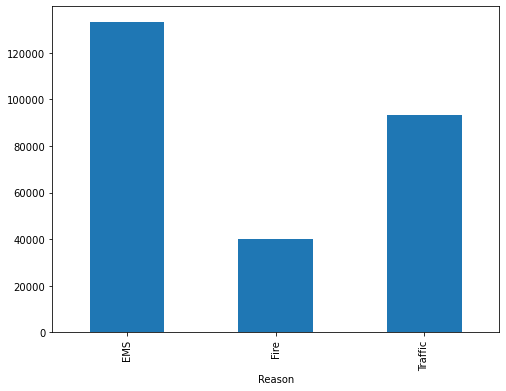

In [36]:
plt.figure(figsize=(8,6))
call_data1.groupby('Reason').count()['e'].plot(kind='bar')

<AxesSubplot:ylabel='Reason'>

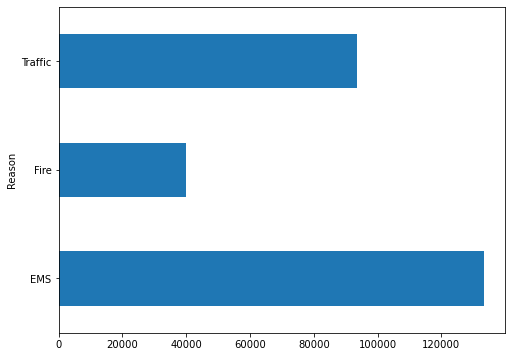

In [35]:
plt.figure(figsize=(8,6))
call_data1.groupby('Reason').count()['e'].plot(kind='barh')

Do data manipulation & Question 5: Which day got maximum calls for EMS and how many?

In [39]:
call_data1['timeStamp'] = pd.to_datetime(call_data1['timeStamp'], format='%Y-%m-%d %H:%M:%S')

In [75]:
dmap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
call_data1['Day of Week'] = call_data1['timeStamp'].apply(lambda x: dmap[x.dayofweek])
x=call_data1['Day of Week'].value_counts().head(1)
print(x)

Friday    40706
Name: Day of Week, dtype: int64


• Compute -- Create a countplot of the Day of Week column with the hue based of the Reason column & Question 6: On which day traffic calls were lowest?

In [76]:
import seaborn as sns

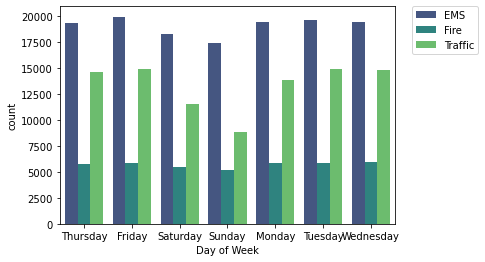

In [88]:
sns.countplot(x = 'Day of Week', data = call_data1, palette='viridis', hue = 'Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

• Compute -- Create a countplot month wise -- Question 7: Which month saw highest calls for fire?

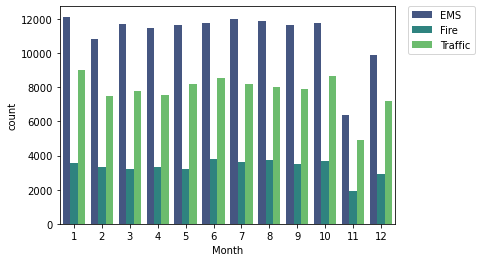

In [92]:
call_data1['Month']= call_data1['timeStamp'].apply(lambda x:x.month)
sns.countplot(x='Month',data =call_data1,palette ='viridis', hue ='Reason')
plt.legend(bbox_to_anchor=(1.04,1),loc=2,borderaxespad=0.)

• Compute -- Create Web Map for Traffic Calls & Question 8: Why some areas seem to have lower or almost zero traffic calls? Hint: Zoom the map

In [97]:
!pip install folium

In [102]:
import folium 
from folium.plugins import HeatMap

map_traffic = folium.Map(location=[40.2978759,-75.5812935],zoom_start = 13) 
folium.TileLayer('openstreetmap').add_to(map_traffic)
call_data['lat'] = call_data['lat'].astype(float)
call_data['lng'] = call_data['lng'].astype(float)
heat_df = call_data[call_data['Reason']=='Traffic'] 
heat_df = heat_df[['lat', 'lng']]
heat_df = heat_df.dropna(axis=0, subset=['lat','lng'])
heat_data = [[row['lat'],row['lng']] for index, row in heat_df.iterrows()]
HeatMap(heat_data).add_to(map_traffic)
map_traffic
